In [16]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [17]:
#reading csv file
healthcare_dataset = pd.read_csv("D:/Sem 6 - Study Materials/Machine_Learning/SA/Healthcare_Investments_and_Hospital_Stay.csv")
print(healthcare_dataset)

    Location  Time  Hospital_Stay  MRI_Units  CT_Scanners  Hospital_Beds
0        AUS  1992            6.6       1.43        16.71           1.43
1        AUS  1994            6.4       2.36        18.48           2.36
2        AUS  1995            6.5       2.89        20.55           2.89
3        AUS  1996            6.4       2.96        21.95           2.96
4        AUS  1997            6.2       3.53        23.34           3.53
..       ...   ...            ...        ...          ...            ...
513      LTU  2014            6.8      10.57        22.17          10.57
514      LTU  2015            6.6      11.02        21.00          11.02
515      LTU  2016            6.6      12.20        23.01          12.20
516      LTU  2017            6.5      12.37        23.33          12.37
517      LTU  2018            6.5      12.49        24.27          12.49

[518 rows x 6 columns]


In [18]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [19]:
def preprocess_inputs(df):
    df = df.copy()
    
    # One-hot encode Location column
    df = onehot_encode(df, column='Location')
    #print(df)
    # Split df into X and y
    y = df['Hospital_Stay'].copy()
    X = df.drop('Hospital_Stay', axis=1).copy()
    
    #splitting into train and test dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)
    
    #Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    return X_train, X_test, y_train, y_test

In [20]:
X_train, X_test, y_train, y_test = preprocess_inputs(healthcare_dataset)

In [21]:
X_train

,Time,MRI_Units,CT_Scanners,Hospital_Beds,AUS,AUT,BEL,CAN,CZE,DEU,...,LVA,NLD,NZL,POL,PRT,RUS,SVK,SVN,TUR,USA
0,-0.303643,0.502340,-0.349986,0.502340,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
1,-0.738679,-0.697320,-0.873325,-0.697320,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
2,0.131392,-0.562147,-0.392384,-0.562147,-0.207913,-0.207913,-0.177028,-0.215041,4.809712,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
3,0.276404,-0.018076,-0.295665,-0.018076,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,6.262765,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
4,1.001462,1.174825,1.272365,1.174825,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,1.146474,-0.248996,-0.302952,-0.248996,-0.207913,-0.207913,-0.177028,-0.215041,4.809712,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
358,0.276404,-0.678170,-0.378472,-0.678170,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,5.648813,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
359,-0.013620,-0.589181,-0.850140,-0.589181,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
360,-0.013620,-0.317709,-0.623580,-0.317709,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,5.181327,-0.140422


In [22]:
y_train

121    7.2
378    7.3
91     6.7
310    6.1
479    5.9
      ... 
98     5.9
322    7.3
382    6.3
365    4.1
510    7.0
Name: Hospital_Stay, Length: 362, dtype: float64

In [23]:
Y = y_train.append(y_test)
Y

121     7.2
378     7.3
91      6.7
310     6.1
479     5.9
       ... 
329     6.6
385     6.0
79      7.5
172     5.6
439    14.0
Name: Hospital_Stay, Length: 518, dtype: float64

In [24]:
Y_new = Y.tolist()

In [25]:
X_whole = pd.concat([X_train, X_test])

In [26]:
X_orig = X_whole

In [27]:
print(X_whole)

         Time  MRI_Units  CT_Scanners  Hospital_Beds       AUS       AUT  \
0   -0.303643   0.502340    -0.349986       0.502340 -0.207913 -0.207913   
1   -0.738679  -0.697320    -0.873325      -0.697320 -0.207913 -0.207913   
2    0.131392  -0.562147    -0.392384      -0.562147 -0.207913 -0.207913   
3    0.276404  -0.018076    -0.295665      -0.018076 -0.207913 -0.207913   
4    1.001462   1.174825     1.272365       1.174825 -0.207913 -0.207913   
..        ...        ...          ...            ...       ...       ...   
151  1.291486  -0.315456    -0.212858      -0.315456 -0.207913 -0.207913   
152  0.566427  -0.402192    -0.728910      -0.402192 -0.207913 -0.207913   
153  0.711439  -0.207318    -0.352636      -0.207318 -0.207913 -0.207913   
154 -0.448655   0.298454     0.356853       0.298454 -0.207913 -0.207913   
155 -1.463737  -1.125367    -1.177392      -1.125367 -0.207913 -0.207913   

          BEL       CAN       CZE      DEU  ...       LVA       NLD       NZL  \
0   -0

In [28]:
# loading index of randomly splitted data
trindex=list(X_train.index)

# loading index of randomly splitted data
teindex=list(X_test.index)

X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
X_test1=X_test
X_test2=X_test

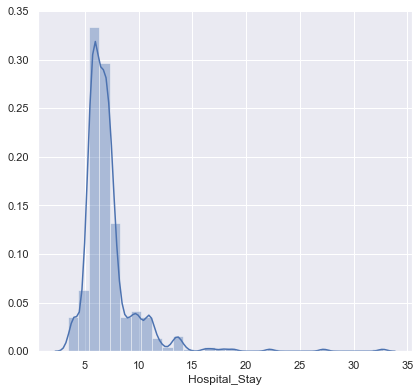

In [29]:
#plotting distribution of Hospital Stay
sns.set(rc={'figure.figsize':(6.7,6.27)})
sns.distplot(Y, bins=30)
plt.show()

In [30]:
#Dataset with target variable values
X_whole.insert(36, "Hospital Stay", Y_new, True)

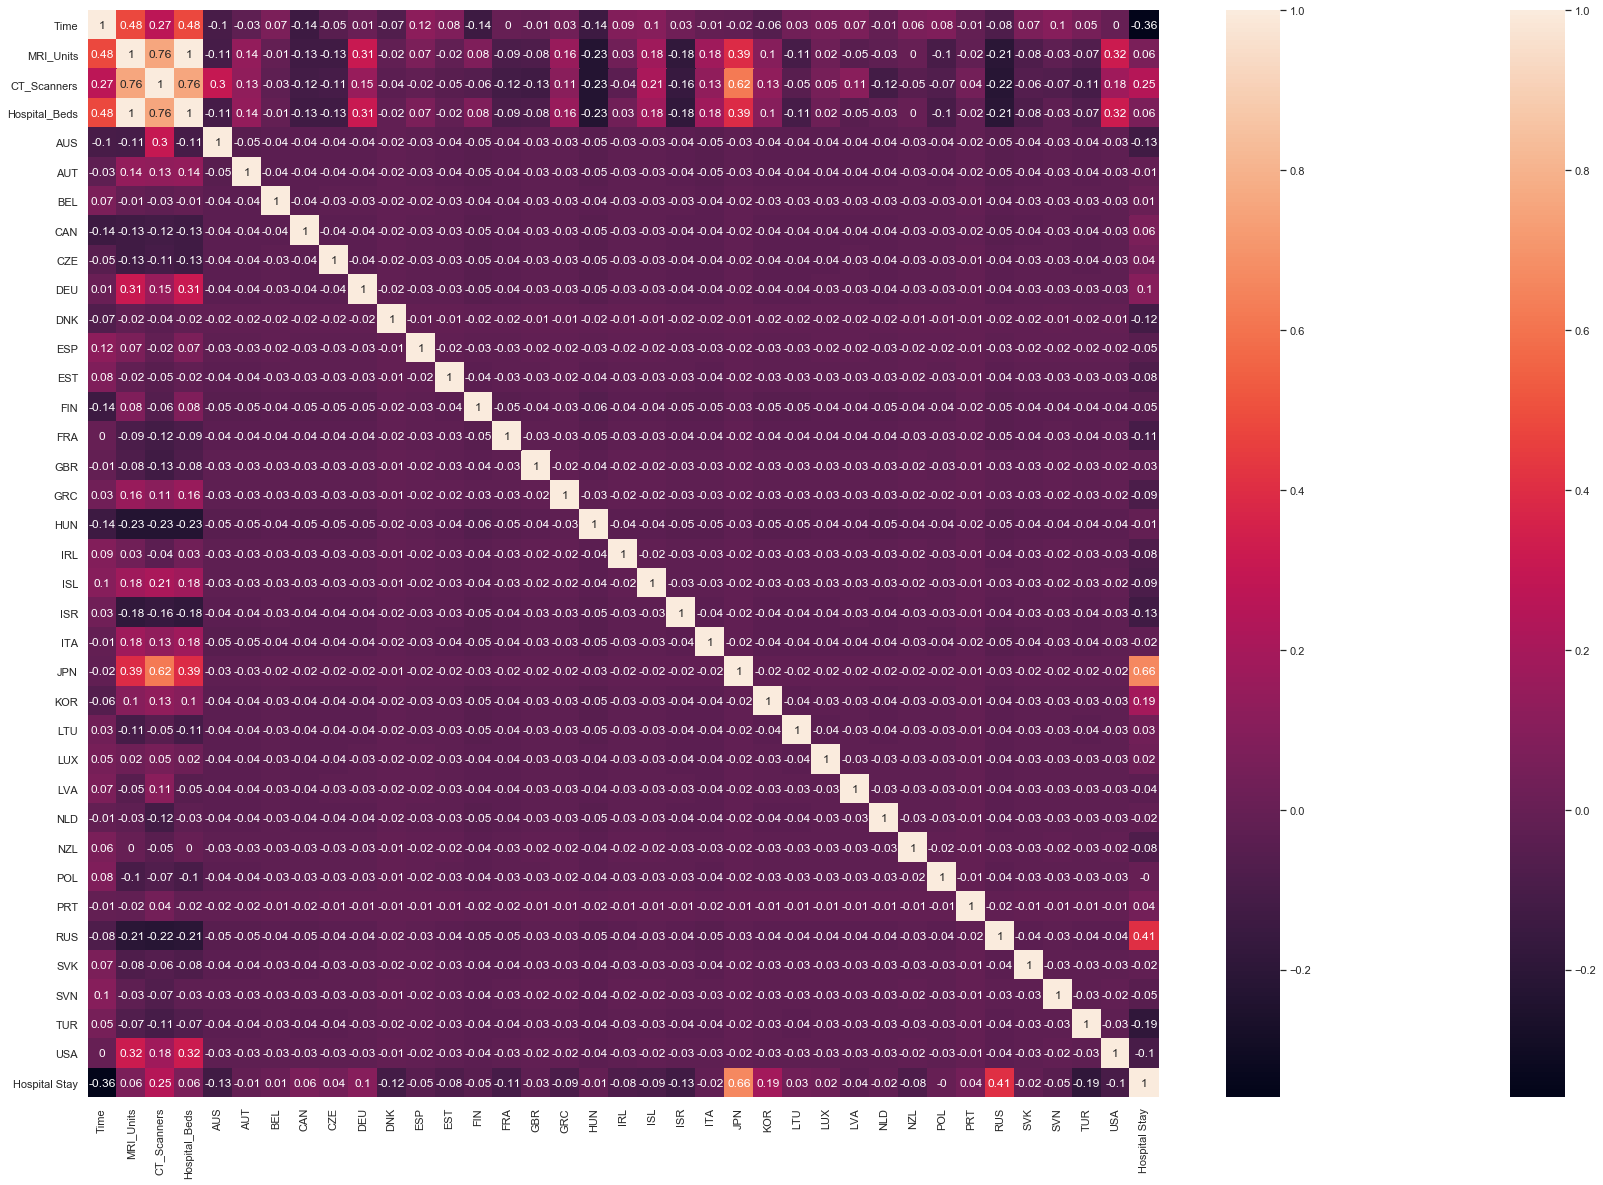

In [31]:
#using correlation matrix ,finding predictor variable
correlation_matrix = X_whole.corr().round(2)
plt.subplots(figsize=(30,20))
sns.heatmap(correlation_matrix)
sns.heatmap(data=correlation_matrix, annot=True)

In [32]:
#removing unnecessary elements that do not affect price , and then storing in 'X_lim_feature'
X_lim_feature = pd.DataFrame(np.c_[X_orig['Time'],X_orig['CT_Scanners'],X_orig['AUS'],X_orig['DEU'],X_orig['DNK'],X_orig['FRA'],X_orig['ISR'],X_orig['JPN'],X_orig['KOR'],X_orig['RUS'],X_orig['TUR'], X_orig['USA']], columns = ['TIME', 'CT_SCANNERS', 'AUS','DEU', 'DNK', 'FRA', 'ISR', 'JPN', 'KOR', 'RUS', 'TUR', 'USA'])

In [33]:
#splitting data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X_lim_feature, Y, test_size = 0.3, random_state=123)

In [34]:
# loading index values of randomly splitted dataframe
trindex=list(X_train.index)

# loading index values of randomly splitted dataframe
teindex=list(X_test.index) 
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X_test1=X_test

In [35]:
#shape of array
print("shape of X_train is: ",X_train.shape)
print("shape of X_test: ",X_test.shape)
print("shape of Y_train: ",Y_train.shape)
print("shape of Y_test: ",Y_test.shape)

shape of X_train is:  (362, 12)
shape of X_test:  (156, 12)
shape of Y_train:  (362,)
shape of Y_test:  (156,)


In [36]:
# creating object of LinearRegression
lin = LinearRegression() 

# fitting line in given data
lin.fit(X_train,Y_train) 
print("value of coefficients of line are: ",lin.coef_)
print("vaue of intercept of line is: ",lin.intercept_)

value of coefficients of line are:  [-0.63827447 -0.41091678 -0.20383485  0.31290952 -0.28534369 -0.25831335
 -0.30790861  2.52175495  0.57145566  0.83081277 -0.43736488 -0.130468  ]
vaue of intercept of line is:  7.182933036114731


In [48]:
# calculating average percentage error in predicted LOS for train set
per=[]
import math
for i in range(Y_train.shape[0]):
    Val=lin.predict([X_train[i]])
    temp=(np.abs(Val-(Y_train[i]))/(Y_train[i]))*100
    per.append(temp)
avgp=sum(per)/len(per)
print("average percentage error for train set is: {}% ".format(avgp[0]))

#calculation of R2 and Root mean square error for train set for checking performance of model 
Y_train_predict = lin.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
r=r2_score(Y_train,Y_train_predict)
print("value of R2 for train set is:             ",r)
print("value of RMSE for train set is:           ",rmse)

average percentage error for train set is: 9.331258657949343% 
value of R2 for train set is:              0.8651801759801825
value of RMSE for train set is:            0.9952249750017587


In [53]:
# calculating average percentage error in predicted LOS for test set
per1=[]
import math
for i in range(Y_test.shape[0]):
    Val=lin.predict([X_test[i]])
    temp=(np.abs(Val-(Y_test[i]))/(Y_test[i]))*100
    per1.append(temp)
avgp1=sum(per1)/len(per1)
print("average percentage error for test set is: {}% ".format(avgp1[0]))

#calculation of R2 and Root mean square error for test set for checking performance of model
Y_test_predict = lin.predict(X_test)
rmse2 = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)
print("value of R2 for test set is:             ",r2)
print("Root mean square value for test set is:  ",rmse2)

average percentage error for test set is: 9.60610201089937% 
value of R2 for test set is:              0.8023265561288625
Root mean square value for test set is:   0.9704255549202886


In [41]:
#Predicting prices
temp=X_test1[0:50]
df1=pd.DataFrame(temp,columns=['Time', 'CT_Scanners', 'AUS', 'DEU', 'DNK', 'FRA', 'ISR', 'JPN', 'KOR', 'RUS', 'TUR', 'USA'])
print("Below data is in NORMALIZED FORM")
print(df1)

Below data is in NORMALIZED FORM
        Time  CT_Scanners       AUS      DEU       DNK       FRA       ISR  \
0   1.291486    -0.699762 -0.207913 -0.16855 -0.074536 -0.207913  5.181327   
1   1.001462     0.060073 -0.207913 -0.16855 -0.074536 -0.207913 -0.193001   
2   0.856451    -0.411595 -0.207913 -0.16855 -0.074536 -0.207913 -0.193001   
3  -0.013620    -0.654053 -0.207913 -0.16855 -0.074536 -0.207913 -0.193001   
4  -0.883690    -0.826291 -0.207913 -0.16855 -0.074536  4.809712 -0.193001   
5  -0.303643    -0.839540 -0.207913 -0.16855 -0.074536 -0.207913 -0.193001   
6   1.001462     0.875554 -0.207913 -0.16855 -0.074536 -0.207913 -0.193001   
7  -0.448655    -0.118127 -0.207913 -0.16855 -0.074536 -0.207913 -0.193001   
8  -0.448655    -0.858089 -0.207913 -0.16855 -0.074536 -0.207913 -0.193001   
9  -2.043784    -1.233038 -0.207913 -0.16855 -0.074536 -0.207913 -0.193001   
10  1.001462    -0.690488 -0.207913 -0.16855 -0.074536 -0.207913  5.181327   
11  1.291486     0.959024 -0.20

In [55]:
ind=int(input("\nEnter the index no. from above data for which you want to predict LOS: "))
LOS=lin.predict([X_test[ind]])

print("\nPREDICTED LENGTH OF STAY IS: ",LOS[0])
print("ORIGINAL LENGTH OF STAY IS : ",y_test[ind])


Enter the index no. from above data for which you want to predict LOS: 32

PREDICTED LENGTH OF STAY IS:  6.663323393134148
ORIGINAL LENGTH OF STAY IS :  5.6
